<a href="https://colab.research.google.com/github/Zhaleh-Havaei/Kmeans_Iris/blob/main/Iris_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal and Problem Description**

In this project the end goal is to implement K-means clustering algorithm and use it to analyse the popular Iris dataset. In this dataset there exist four features for three different species of iris flowers. The goal is to cluster the flowers based on their feature measurements. While libraries such Skllearn offer well-optimized implementations of k-means clustering and provide convenient interfaces to perform clustering on your data, my goal here was to use no pre-built implementations of k-means clustering and implelment from scrtatch to learn the basics of this algortihms as well as improving my programming skill in Python.

**Importing Libraries**

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing




**Implementing Class K-means**

In [155]:
import numpy as np

class MyKMeans:
    def __init__(self, K=2, max_iteration=5000):
        self.K = K
        self.max_iteration = max_iteration

    def uniform_init(self, X):
        n_samples, n_features = X.shape
        np.random.seed(77)
        random_sample_indices = np.random.choice(n_samples, self.K, replace=False)
        self.centroids = X[random_sample_indices]

    def fit(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        self.uniform_init(X)

        # Trying to find better positions for the starting points
        for _ in range(self.max_iteration):
            # Figuring out which starting point is closest to each point in our data
            distances = np.linalg.norm(self.X[:, np.newaxis] - self.centroids, axis=-1)
            self.labels = np.argmin(distances, axis=1)

            # Moving the starting points to the average of the points close to them
            new_centroids = np.array([self.X[self.labels == i].mean(axis=0) for i in range(self.K)])

            # Checking if the starting points have stopped moving much
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=-1)
        labels = np.argmin(distances, axis=1)
        return labels



**Loading Iris Dataset**

In [156]:
iris = load_iris()
X = iris.data  # Features
y = iris.target  # True labels



**Standardizing Features**

 Standardizing the features helps ensure that all features contribute equally to the clustering process.

In [157]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Using K-Means to Cluster Data**

In [158]:
myKmeans = MyKMeans(K=3)
myKmeans.fit(X_scaled)
predicted_labels = myKmeans.predict(X_scaled)


**Data Visualization**

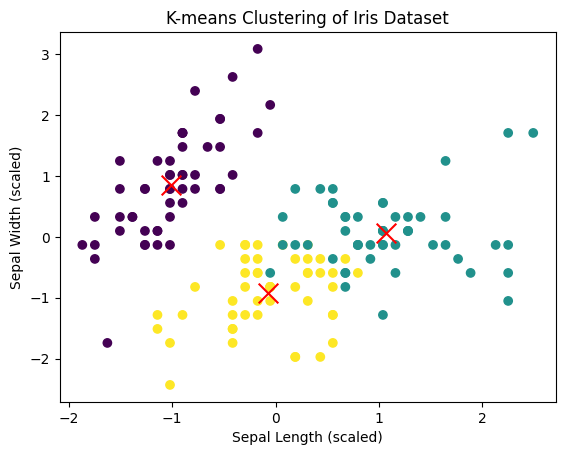

In [159]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=predicted_labels, cmap='viridis')
plt.scatter(myKmeans.centroids[:, 0], myKmeans.centroids[:, 1], marker='x', s=200, c='red')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('K-means Clustering of Iris Dataset')
plt.show()

**Future Work**

I can consider implementing and comparing both initialization methods to see how they affect clustering results on the Iris dataset. Further, I can asses the quality of the clustering based on different metrics such the Adjusted Rand Index (ARI) or Normalized Mutual Information (NMI).

**References**

https://en.wikipedia.org/wiki/K-means_clustering

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html